# Problem 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image_path = 'flower.webp'

In [3]:
# Load the image
img = plt.imread(image_path)

In [4]:
# Convert the image to grayscale if it's in color
if len(img) == 3:
    img = np.mean(img, axis=2)

In [5]:
# Calculate the histogram of the original image
original_hist, bins = np.histogram(img.flatten(), bins=256, range=(0, 256))

In [7]:
# Calculate the cumulative distribution function (CDF)
cdf = original_hist.cumsum()

In [8]:
# Normalize the CDF ot be in the range [0, 255]
cdf_normalized = ((cdf - cdf.min()) * 255) / (cdf.max() - cdf.min())

In [10]:
# Map the values in the original image to their corresponding values in the equalized image
equalized_matrix = cdf_normalized[img.astype(int)]

In [19]:
# Convert the equalized matrix back to an image
equalized_img = equalized_matrix.astype(np.uint8)

In [20]:
# Calculate the histogram of the equalized image
equalized_hist, _ = np.histogram(equalized_img.flatten(), bins=256, range=(0, 256))

In [21]:
# Calculate teh cumulative distribution function (CDF)
equalized_cdf = equalized_hist.cumsum()

In [22]:
# Normalize the CDF to be in the range [0, 255]
equalized_cdf_normalized = ((equalized_cdf - equalized_cdf.min()) * 255) / (equalized_cdf.max() - equalized_cdf.min())

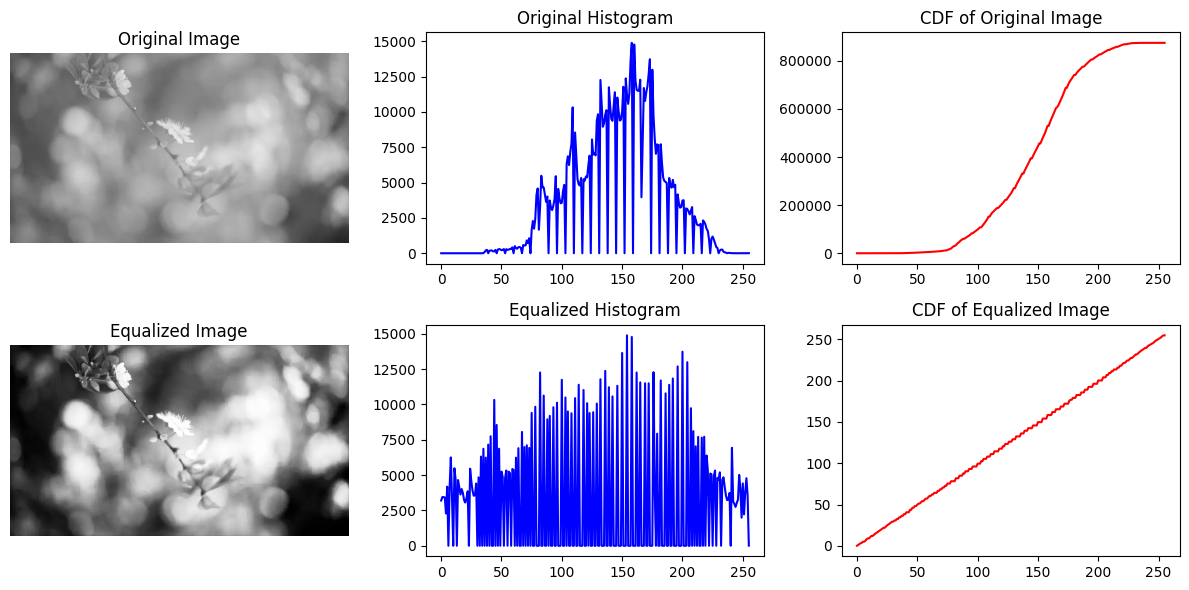

In [25]:
# Plot the images
# Plot the original image and its histogram
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.plot(original_hist, color='b')
plt.title('Original Histogram')

# Plot the cumulative distribution function (CDF)
plt.subplot(2, 3, 3)
plt.plot(cdf, color='r')
plt.title('CDF of Original Image')

# Plot the equalized image and its histogram
plt.subplot(2, 3, 4)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.plot(equalized_hist, color='b')
plt.title('Equalized Histogram')

# Plot the normalized cumulative distribution function (CDF)
plt.subplot(2, 3, 6)
plt.plot(equalized_cdf_normalized, color='r')
plt.title('CDF of Equalized Image')


plt.tight_layout()
plt.show()


# Problem 2

In [32]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [4]:
image = cv2.imread('image.jpeg')

In [5]:
kernel = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])

In [6]:
convolved_image = cv2.filter2D(image, -1, kernel)

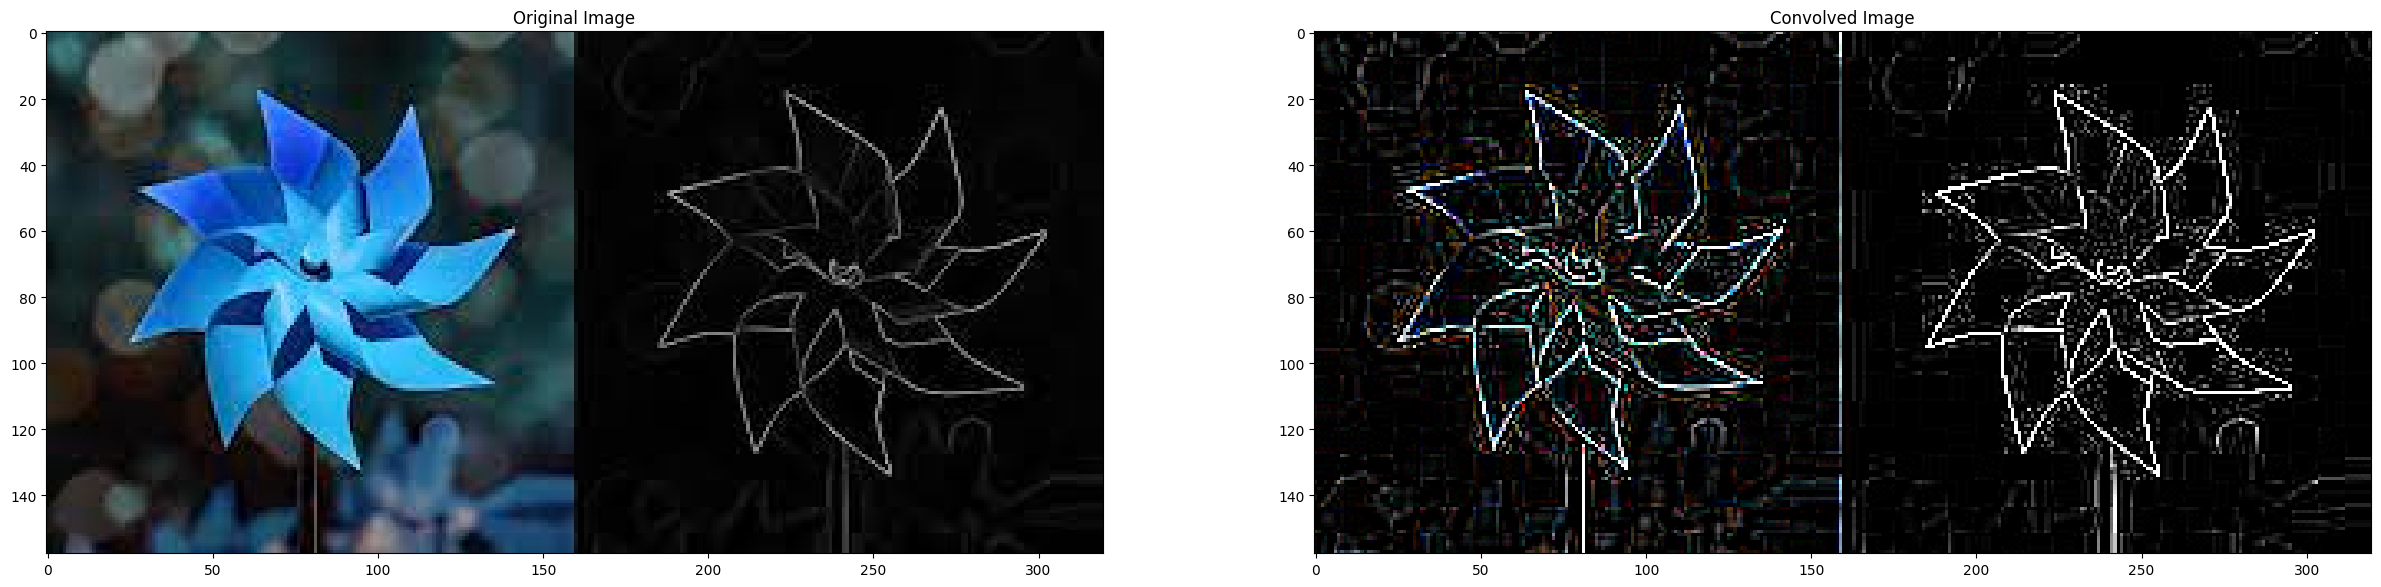

In [7]:
plt.figure(figsize=(30, 15))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.title("Convolved Image")
plt.imshow(convolved_image)
plt.show()

# Problem 3

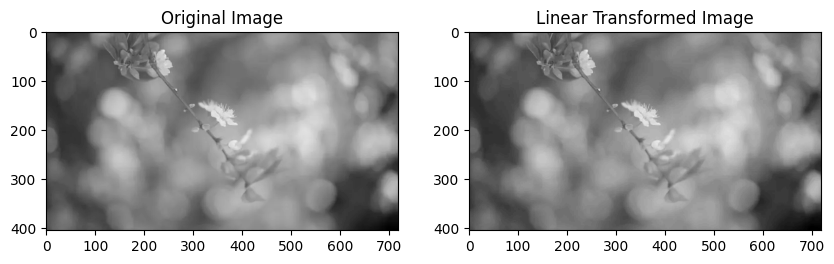

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread('./flower.webp', cv2.IMREAD_GRAYSCALE)

# Define scaling parameters for linear transformation
alpha = .3
beta = 1

# Apply linear transformation
linear_transformed_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

# Display the original and transformed images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Linear Transformed Image')
plt.imshow(linear_transformed_image, cmap='gray')

plt.show()


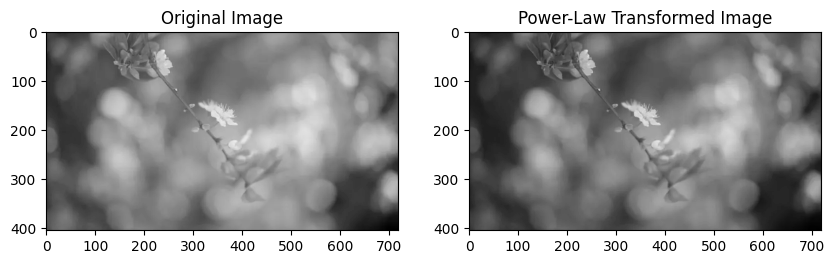

In [10]:
import cv2
import numpy as np

# Load an image
image = cv2.imread('./flower.webp', cv2.IMREAD_GRAYSCALE)

# Define the gamma value (typically between 0.1 and 3.0)
gamma = 1.5

# Apply gamma correction
gamma_corrected_image = np.power(image / 255.0, gamma) * 255.0

# Convert to uint8 data type
gamma_corrected_image = np.uint8(gamma_corrected_image)

# Save the output image
cv2.imwrite('gamma_corrected_image.jpg', gamma_corrected_image)


# Display the original and transformed images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Power-Law Transformed Image')
plt.imshow(gamma_corrected_image, cmap='gray')

plt.show()

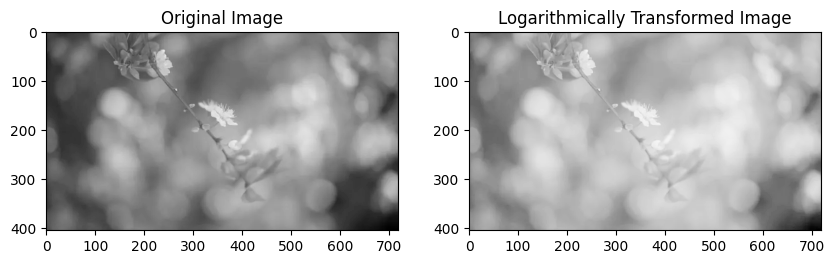

In [9]:
import cv2
import numpy as np

# Load an image
image = cv2.imread('./flower.webp', cv2.IMREAD_GRAYSCALE)

# Define a constant for the logarithmic transformation
c = 1  # Adjust this value to control the effect

# Apply logarithmic transformation
log_transformed_image = c * np.log1p(image)

# Scale the values to the 0-255 range
log_transformed_image = ((log_transformed_image - np.min(log_transformed_image)) / (np.max(log_transformed_image) - np.min(log_transformed_image))) * 255

# Convert to uint8 data type
log_transformed_image = np.uint8(log_transformed_image)

# Save the output image
cv2.imwrite('log_transformed_image.jpg', log_transformed_image)



# Display the original and transformed images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Logarithmically Transformed Image')
plt.imshow(log_transformed_image, cmap='gray')

plt.show()
